<a href="https://colab.research.google.com/github/kandicegg/einstein_clinical_covid-19/blob/master/COVID_19_Worldwide_Exploratory_Analysis_%26_Incidence_in_Immunocompromised_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Worldwide COVID-19 Cases Exploratory Analysis
---
> What is the trajectory of the infection of COVID-19 worldwide and per country?
>*  An exploratory analysis of the COVID-19 cases worldwide and at the country-level was done to get a background of the current effect of the virus in terms of confirmed cases, deaths and recovered cases. 
>*  Data visualizations were created on Tableau to better understand the trajectory of COVID-19 infection over time.
>*  The goal of this analysis discover actionable insights centered on preventative measures that may help reduce the risk of transmission.

> Acknowledgments:
>* Raw data obtained from Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)
>* https://github.com/CSSEGISandData/COVID-19




In [59]:
# Install and import the libraries 
import requests
import math
import pandas as pd
!pip3 install wget
!pip3 install matplotlib
import wget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [0]:
# Get the websites needed
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

# To download csv files
for url in urls: 
  filename = wget.download(url)

In [0]:
# Obtain dataframes for confirmed, deaths and recovered cases on the global scale
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [8]:
# Get an overview of the columns of the dataframe
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 144 entries, Province/State to 6/9/20
dtypes: float64(2), int64(140), object(2)
memory usage: 299.4+ KB


In [68]:
# Get info on columns
confirmed_df.columns
deaths_df.columns
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20',
       '6/7/20', '6/8/20', '6/9/20'],
      dtype='object', length=144)

In [69]:
# Return first n rows of dataframe
confirmed_df.head()
deaths_df.head()
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,468,472,493,499,514,521,526,537,545,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,13,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38


In [71]:
# Extract dates
dates = confirmed_df.columns[4:]

# Melt dataframes into longer format
confirmed_df_long = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recovered_df_long = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

print(confirmed_df_long.shape)
print(deaths_df_long.shape)
print(recovered_df_long.shape)

(37240, 6)
(37240, 6)
(35280, 6)


In [72]:
# Merge dataframes to show daily confirmed, deaths and recovered cases
# full_table = pd.concat([confirmed_df_long, deaths_df_long['Deaths'], recovered_df_long['Recovered']],axis=1, sort=False)
full_table = pd.merge(left=confirmed_df_long, right=deaths_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
full_table = pd.merge(left=full_table, right=recovered_df_long, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0.0


In [73]:
full_table.shape


(37240, 8)

In [0]:
# Renaming countries, regions, provinces
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [0]:
# Removing county wise data to avoid double counting
full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [77]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 0 to 37239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11200 non-null  object 
 1   Country/Region  37100 non-null  object 
 2   Lat             37100 non-null  float64
 3   Long            37100 non-null  float64
 4   Date            37100 non-null  object 
 5   Confirmed       37100 non-null  int64  
 6   Deaths          35420 non-null  float64
 7   Recovered       33180 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ MB


In [79]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0.0


Obtaining COVID-19 Case Data Per Country 

In [23]:
# Obtain cases per country on a specific date, e.g. Italy
full_table[(full_table['Date']=='5/30/20') & (full_table['Country/Region']=='Italy')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
34451,NaN,Italy,43.0,12.0,5/30/20,232664,33340.0,155633.0


In [24]:
# Data for Italy
italy_state_wise = full_table[full_table['Country/Region']=='Italy']
italy_state_wise['Province/State'].unique()
italy_state_wise.to_csv('italy_state_wise.csv', index=False)

italy_state_wise

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
137,NaN,Italy,43.0,12.0,1/22/20,0,0.0,0.0
403,NaN,Italy,43.0,12.0,1/23/20,0,0.0,0.0
669,NaN,Italy,43.0,12.0,1/24/20,0,0.0,0.0
935,NaN,Italy,43.0,12.0,1/25/20,0,0.0,0.0
1201,NaN,Italy,43.0,12.0,1/26/20,0,0.0,0.0
...,...,...,...,...,...,...,...,...
36047,NaN,Italy,43.0,12.0,6/5/20,234531,33774.0,163781.0
36313,NaN,Italy,43.0,12.0,6/6/20,234801,33846.0,165078.0
36579,NaN,Italy,43.0,12.0,6/7/20,234998,33899.0,165837.0
36845,NaN,Italy,43.0,12.0,6/8/20,235278,33964.0,166584.0


In [80]:
# Saving data at the specific country level, e.g. Italy
italy_state_wise.to_csv

<bound method NDFrame.to_csv of       Province/State Country/Region   Lat  ...  Confirmed   Deaths  Recovered
137              NaN          Italy  43.0  ...          0      0.0        0.0
403              NaN          Italy  43.0  ...          0      0.0        0.0
669              NaN          Italy  43.0  ...          0      0.0        0.0
935              NaN          Italy  43.0  ...          0      0.0        0.0
1201             NaN          Italy  43.0  ...          0      0.0        0.0
...              ...            ...   ...  ...        ...      ...        ...
36047            NaN          Italy  43.0  ...     234531  33774.0   163781.0
36313            NaN          Italy  43.0  ...     234801  33846.0   165078.0
36579            NaN          Italy  43.0  ...     234998  33899.0   165837.0
36845            NaN          Italy  43.0  ...     235278  33964.0   166584.0
37111            NaN          Italy  43.0  ...     235561  34043.0   168646.0

[140 rows x 8 columns]>

In [81]:
confirmed_df_long.shape

(37240, 6)

Most Recent COVID-19 Case Information Per Country
> Active cases are equivalent to confirmed cases that do not have a definitive end result, i.e. confirmed cases that did not result in deaths or recoveries.

In [89]:
#Get a summarized table of most recent case information per country including active cases
data_per_country= full_table
data_per_country['Active'] = data_per_country['Confirmed'] - data_per_country['Deaths'] - data_per_country['Recovered']
result = data_per_country.groupby('Country/Region')['Date','Confirmed', 'Deaths', 'Recovered', 'Active'].max().reset_index()
print(result) 

result.to_csv('latest_data_per_country_.csv', index=False)

         Country/Region    Date  Confirmed  Deaths  Recovered   Active
0           Afghanistan  6/9/20      21459   384.0     2651.0  18424.0
1               Albania  6/9/20       1299    34.0      960.0    305.0
2               Algeria  6/9/20      10382   724.0     6951.0   3162.0
3               Andorra  6/9/20        852    51.0      757.0    504.0
4                Angola  6/9/20         96     4.0       38.0     64.0
..                  ...     ...        ...     ...        ...      ...
183  West Bank and Gaza  6/9/20        481     3.0      404.0    275.0
184      Western Sahara  6/9/20          9     1.0        6.0      6.0
185               Yemen  6/9/20        524     NaN        NaN      NaN
186              Zambia  6/9/20       1200    10.0      912.0    628.0
187            Zimbabwe  6/9/20        314     4.0       46.0    264.0

[188 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Daily Worldwide COVID-19 Cases

In [90]:
# Obtain time series data of worldwide COVID-19 cases (confirmed, deaths, recovered and active)
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0.0,0.0


In [0]:
#Saving table to csv file
full_table.to_csv('covid_19_clean.csv', index=False)

#Data Visualizations
>The data visualizations below were created on Tableau:\
https://public.tableau.com/profile/kandice.gunawan#!/vizhome/COVID-19InteractiveDashboard_15914083338270/COVID-19InteractiveDashboard

Worldwide Covid-19 Cases Over Time
>This area chart shows a time series of COVID-19 cases (confirmed, recovered and deaths) over time from January 22nd, 2020 until today.
![picture](https://drive.google.com/uc?id=1JKaJ0DsLKPLYQn06Tn3Az84j6AkTYpmj)

Interactive worldwide map of active COVID-19 cases showing active cases.
>* This worldwide map is interactive and shows the incidence of COVID-19 cases worldwide per country. 
>* As on June 9th, 2020, the United States has the highest number of active cases, as indicated by the dark blue shading. 

![picture](https://drive.google.com/uc?id=1bPftVFzviVa-xYxfXqkth8zVFsQ6MEOS)

COVID-19 Interactive Dashboard
>* This dashboard shows a time series of the worldwide COVID-19 confirmed cases, deaths, and recovered cases.
>* The dashboard is interactive at the country-level, with a drop-down menu to select a specific country that shows COVID-19 confirmed cases, deaths and recovered cases in that specific country.
>* This screenshot of the dashboard currently shows the cases worldwide as well as cases in Italy.

![picture](https://drive.google.com/uc?id=1uszYfN8ZkHQeGC4_OO6ZpR7v3BTlPwOo)


---

#Part 2: Incidence of COVID-19 Infection in Immunocompromised Patients
> Is the incidence of COVID-19 higher in immunocompromised patients than non-immunocompromised patients?
>* This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil.
>* These patients had samples collected to perform the SARS-CoV-2 RT-PCR (whether they tested positive for COVID-19) and additional laboratory tests during a visit to the hospital.
>* All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

> Hypothesis Testing
>* A statistical analysis (two sample z-test) was conducted to test whether there is a significant difference in COVID-19 infection between patients who are immunocompromised and patients who are not immunocompromised.
>* For this experiment, we are assuming that immunocompromised patients are patients with lab results that are above or below the standard deviation. 

>Acknowledgements: \
>* Raw data was obtained from Kaggle (https://www.kaggle.com/roche-data-science-coalition/uncover?)
>* https://github.com/kandicegg/einstein_clinical_covid-19/blob/master/diagnosis-of-covid-19-and-its-clinical-spectrum.csv


In [0]:
# Download file from the url
new_url = "https://raw.githubusercontent.com/kandicegg/einstein_clinical_covid-19/master/diagnosis-of-covid-19-and-its-clinical-spectrum.csv"
filename = wget.download(new_url)

In [0]:
clinical_df = pd.read_csv('diagnosis-of-covid-19-and-its-clinical-spectrum.csv')

In [94]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, patient_id to cto2_arterial_blood_gas_analysis
dtypes: float64(69), int64(1), object(41)
memory usage: 4.8+ MB


In [95]:
clinical_df.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,...,urine_esterase,urine_aspect,urine_ph,urine_hemoglobin,urine_bile_pigments,urine_ketone_bodies,urine_nitrite,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some observations from the dataset:
>* sars_cov_2_exam_result (Column 3) -- indicates whether patient tested 'positive' or 'negative' for COVID-19
>* lab tests (Columns 7 and onwards) -- indicate lab tests that were performed while the patient was in the hospital. This will be a basis that will be used to indicate whether the patient was immunocompromised.

In [96]:
#For each lab test, determine minimum sample size for needed for statistical sample. (Since a lot of lab test values are null values.)
#The minimum sample size was calculated using this online calculator: (https://www.qualtrics.com/experience-management/research/determine-sample-size/)

population_size = clinical_df.shape[0]
print('The population size of this dataset is' , population_size)
population_size = 5644

# Confidence level: 95%
# Confidence interval: 4
min_sample_size = 543
print('The minimum sample size of this dataset is' , min_sample_size)

The population size of this dataset is 5644
The minimum sample size of this dataset is 543


In [98]:
# List the columns that contain lab tests, from column 6 onwards
columns = list(clinical_df.columns)
lab_tests = columns[6:]

# Find valid lab tests by counting the number of results for each lab test. 
# Lab test is valid only if the count is below the min_sample_size.
valid_lab_tests = list()

for lab_test in lab_tests:
    sample = len(clinical_df[clinical_df[lab_test].notnull()])
    
    if sample >= min_sample_size:
        valid_lab_tests.append(lab_test)
        
print("Valid lab tests with sample size >= " + str(min_sample_size) + "\n" + str(valid_lab_tests))


Valid lab tests with sample size >= 543
['hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes', 'red_blood_cell_distribution_width_rdw', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2', 'influenza_b_rapid_test', 'influenza_a_rapid_test']


In [101]:
# Separate the numerical lab test results from boolean lab test results. 
# Some test results have numerical values while others have boolean results.

data_type = np.dtype('float64')

numerical_lab_tests = list()
boolean_lab_tests = list()

for test in valid_lab_tests:
    if clinical_df[test].dtype == data_type:
        numerical_lab_tests.append(test)        
    else:
        unique_values = list(clinical_df[test].unique())

# Look for the presence of the word "detected"
        if "detected" in unique_values:
            boolean_lab_tests.append(test)

print("Numerical tests: " + str(numerical_lab_tests))
print("\nBoolean tests: " + str(boolean_lab_tests))

Numerical tests: ['hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes', 'red_blood_cell_distribution_width_rdw']

Boolean tests: ['respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus']


In [102]:
# Find the original number of patients.
print("Original number of patients: " + str(len(clinical_df)))

Original number of patients: 5644


In [38]:
#Find the number of patients who have least one recorded result in the lab test. 
patients_with_numerical_results = list()

for index, row in clinical_df.iterrows():
    patientID = row['patient_id']
    
    hasResults = False
    for numTest in numerical_lab_tests:
        if not pd.isna(row[numTest]):
            hasResults = True
            break
    
    if hasResults:
        patients_with_numerical_results.append(patientID)

patients_with_results_df = clinical_df[clinical_df['patient_id'].isin(patients_with_numerical_results)].copy()

print("Number of patients with at least one numerical lab result: " + str(len(patients_with_results_df)))

Number of patients with at least one numerical lab result: 603


In [106]:
# Get descriptive statistics on all the lab test values
patients_with_results_df.describe()

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,urine_density,urine_sugar,urine_red_blood_cells,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis,numHighTests,numLowTests,numNormalTests,numDetectedTests,numNotDetectedTests,numValidNumTests,numValidBoolTests
count,603.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,396.000000,502.000000,423.000000,370.000000,368.000000,224.000000,225.000000,152.000000,181.000000,181.000000,181.000000,143.000000,5.000000e+01,4.000000e+01,135.000000,135.000000,135.000000,135.000000,1.0,135.000000,135.000000,135.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,54.000000,0.0,54.000000,0.0,9.100000e+01,1.330000e+02,100.000000,0.0,3.000000e+00,103.000000,2.300000e+01,2.700000e+01,8.000000e+00,0.0,12.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,11.140962,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,0.000922,0.003367,0.004102,-0.001846,0.001172,0.001635,-0.003236,0.002766,0.004349,0.003240,0.004260,-0.022787,1.907349e-08,-5.215407e-09,0.004561,0.000841,0.008304,0.001525,0.0,0.008782,0.002768,0.008824,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,-0.023199,NaN,0.048213,NaN,-9.824941e-10,-4.733639e-09,-0.024625,NaN,-1.986822e-08,-0.001532,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,0.044905,-1.379731e-10,8.416397e-09,-1.655685e-09,4.139210e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656614e-09,6.332993e-09,5.243001e-09,1.883914,1.709784,10.379768,0.315091,9.396352,13.973466,9.711443
std,5.718045,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.002360,1.004205,0.998793,1.002074,1.000792,1.004173,1.003270,1.006015,1.003818,1.004584,1.003888,0.968909,1.010153e+00,1.012739e+00,1.006019,1.007387,1.002735,1.007277,NaN,1.002176,1.006914,1.002126,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,0.979864,NaN,1.143837,NaN,1.005540e+00,1.003781e+00,0.978947,NaN,1.224745e+00,1.009634,1.022475e+00,1.019049e+00,1.069045e+00,NaN,1.073881,1.019049e+00,1.019049e+00,1.019049e+00,1.01

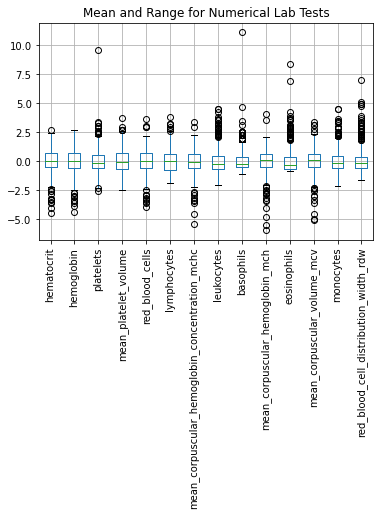

In [105]:
# Plotting a boxplot chart to visualize the mean and range of numerical lab tests.
plt.title("Mean and Range for Numerical Lab Tests")
plt.boxplot = patients_with_results_df.boxplot(column=['hematocrit','hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes', 'red_blood_cell_distribution_width_rdw'])
plt.xticks(rotation=90)
plt.show()

* The mean value of each lab test with a numerical result is close to 0 with a standard deviation of 1. This is accurate with how the data was originally normalized.

* For the purpose of our hypothesis testing, we will assume that a test result that does not fall within the standard deviation of each lab test to be considered an abnormal test result. 

* We will thus assume that immunocompromised patients are patients with abnormal lab results who did not test positive for any other disease besides COVID-19 such as Respiratory Syncytial Virus (RSV),	Influenza A, etc.

* This would mean non-immunocompromised patients are patients with normal lab results who did not test positive for any other disease besides COVID-19.

In [42]:
print(patients_with_results_df)

           patient_id  ...  cto2_arterial_blood_gas_analysis
1     126e9dd13932f68  ...                               NaN
8     8bb9d64f0215244  ...                               NaN
15    6c9d3323975b082  ...                               NaN
18    d3ea751f3db9de9  ...                               NaN
22    2c2eae16c12a18a  ...                               NaN
...               ...  ...                               ...
5602  c5b44ff9c7782fd  ...                          0.182693
5614  88cce1444e16f9c  ...                               NaN
5615  2733fac0d3f7138  ...                               NaN
5618  acd761fe16b5d0f  ...                               NaN
5643  2697fdccbfeb7f7  ...                               NaN

[603 rows x 111 columns]


In [0]:
# Add columns to the dataframe to signify whether each patient exhibited a significant 
# (more than 1 standard deviation higher or lower than the mean) for any lab result, 
# and whether they tested positive for any diseases.

# Add columns for patients with 'detected' diseases
testStats = dict()
minErrorToTest = dict()

for test in numerical_lab_tests:
    # Calculate mean, stdev
    testStats[test] = dict()
    
    meanVal = patients_with_results_df[test].mean()
    minVal = patients_with_results_df[test].min()
    maxVal = patients_with_results_df[test].max()
    stdVal = patients_with_results_df[test].std()

    testStats[test]["mean"] = meanVal
    testStats[test]["std"] = stdVal
    testStats[test]["min"] = minVal
    testStats[test]["max"] = maxVal
    testStats[test]["min1Std"] = meanVal - stdVal
    testStats[test]["max1Std"] = meanVal + stdVal
     
    minError = meanVal - minVal
    if minError not in minErrorToTest:
        minErrorToTest[minError] = list()
        
    minErrorToTest[minError].append(test)

sortedMins = reversed(sorted(minErrorToTest.keys()))

meansForPlot = list()
testNamesForPlot = list()
minsForPlot = list()
maxsForPlot = list()
minStdForPlot = list()
maxStdForPlot = list()

def calculateHighLowNormalTest(row, mode, testNames, testStats):
    
    testCount = 0
    
    for testName in testNames:
        stats = testStats[testName]       
    
        if mode == "high":
            if row[testName] > stats["max1Std"]:
                testCount += 1
                
        elif mode == "low":
            if row[testName] < stats["min1Std"]:
                testCount += 1
                
        elif mode == "normal":
            if row[testName] <= stats["max1Std"] and row[testName] >= stats["min1Std"]:
                testCount += 1
        
        else:
            print("Unrecognized mode: " + mode)
            sys.exit(1)
    
    return testCount

In [0]:
def sumRecordedTests(row, testType, testNames):
    count = 0
    
    if testType == "num":
        for testName in testNames:
            if not math.isnan(row[testName]):
                count += 1
                
    elif testType == "bool":
        for testName in testNames:
            if isinstance(row[testName], float):
                continue
            if "detected" in row[testName]:
                count += 1
            
    return count

def calculateBooleanTest(row, stringToFind, booleanTests):
    count = 0
    
    for bt in booleanTests:
        if isinstance(row[bt], float):
            continue
            
        if row[bt] == stringToFind:
            count += 1
            
    return count

In [0]:
patients_with_results_df['numHighTests'] = patients_with_results_df.apply(lambda row: calculateHighLowNormalTest(row, "high", numerical_lab_tests, testStats), axis=1)
patients_with_results_df['numLowTests'] = patients_with_results_df.apply(lambda row: calculateHighLowNormalTest(row, "low", numerical_lab_tests, testStats), axis=1)
patients_with_results_df['numNormalTests'] = patients_with_results_df.apply(lambda row: calculateHighLowNormalTest(row, "normal", numerical_lab_tests, testStats), axis=1)

patients_with_results_df['numDetectedTests'] = patients_with_results_df.apply(lambda row: calculateBooleanTest(row, "detected", boolean_lab_tests), axis=1)
patients_with_results_df['numNotDetectedTests'] = patients_with_results_df.apply(lambda row: calculateBooleanTest(row, "not_detected", boolean_lab_tests), axis=1)


patients_with_results_df['numValidNumTests'] = patients_with_results_df.apply(lambda row: sumRecordedTests(row, "num", numerical_lab_tests), axis=1)
patients_with_results_df['numValidBoolTests'] = patients_with_results_df.apply(lambda row: sumRecordedTests(row, "bool", boolean_lab_tests), axis=1)


In [111]:
patients_with_results_df.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,...,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis,numHighTests,numLowTests,numNormalTests,numDetectedTests,numNotDetectedTests,numValidNumTests,numValidBoolTests
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,13,1,15,14,16
8,8bb9d64f0215244,1,negative,f,t,f,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.127395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089481,0.296546,0.907723,NaN,NaN,-0.267856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN,3,3,8,0,16,14,16
15,6c9d3323975b082,9,negative,f,f,f,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.880570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000994,-0.042972,-0.792007,NaN,NaN,-0.240915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,8,1,15,14,16
18,d3ea751f3db9de9,11,negative,f,f,f,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.265957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,14,1,15,14,16
22,2c2eae16c12a18a,9,negative,f,f,f,0.190738,-0

In [118]:
# Divide data into two groups: 
# Group 1: Immunocompromised patients 
# Group 2: Non-immunocompromised patients

# Group 1: Immunocompromised patients (abnormal lab results, did not test positive for any other disease)

group1 = patients_with_results_df[((patients_with_results_df['numHighTests'] + patients_with_results_df['numLowTests']) > 0) & (patients_with_results_df['numValidBoolTests'] > 0) & (patients_with_results_df['numNotDetectedTests'] == patients_with_results_df['numValidBoolTests'])]

group1Size = len(group1)

positiveGroup1 = len(group1[group1['sars_cov_2_exam_result'] == 'positive'])
negativeGroup1 = len(group1[group1['sars_cov_2_exam_result'] == 'negative'])

print("Immunocompromised patients (Group 1) size: " + str(group1Size))

Immunocompromised patients (Group 1) size: 183


In [117]:
# Group 2: Immunocompromised patients (normal test results, did not test positive for any other disease)
group2 = patients_with_results_df[(patients_with_results_df['numNormalTests'] > 0) &
                                ((patients_with_results_df['numHighTests'] + patients_with_results_df['numLowTests']) == 0)]

group2Size = len(group2)

positiveGroup2 = len(group2[group2['sars_cov_2_exam_result'] == 'positive'])
negativeGroup2 = len(group2[group2['sars_cov_2_exam_result'] == 'negative'])

print("Non-immunocompromised patients (Group 2) size: " + str(group2Size))

Non-immunocompromised patients (Group 2) size: 39


In [119]:
print("Immunocompromised patients who tested positive for COVID-19 size: " + str(positiveGroup1))
print("Non-immunocompromised patients who tested positive for COVID-19 size: " + str(positiveGroup2))

Immunocompromised patients who tested positive for COVID-19 size: 50
Non-immunocompromised patients who tested positive for COVID-19 size: 5


In [120]:
# Find fractions of Group 1 and Group 2 patients who tested positive for COVID-19
print("Group 1 (immunocompromised patients) fraction of patients testing positive for COVID-19:\t" + str(positiveGroup1/group1Size))
print("Group 2 (Not immunocompromised patients) fraction of patients testing positive for COVID-19:\t" + str(positiveGroup2/group2Size))
print()
print("Group 1 (Immunocompromised pts) fraction of patients testing negative for COVID-19:\t" + str(negativeGroup1/group1Size))
print("Group 2 (Not immunocompromised patients) fraction of patients testing negative for COVID-19:\t" + str(negativeGroup2/group2Size))

Group 1 (immunocompromised patients) fraction of patients testing positive for COVID-19:	0.273224043715847
Group 2 (Not immunocompromised patients) fraction of patients testing positive for COVID-19:	0.1282051282051282

Group 1 (Immunocompromised pts) fraction of patients testing negative for COVID-19:	0.726775956284153
Group 2 (Not immunocompromised patients) fraction of patients testing negative for COVID-19:	0.8717948717948718


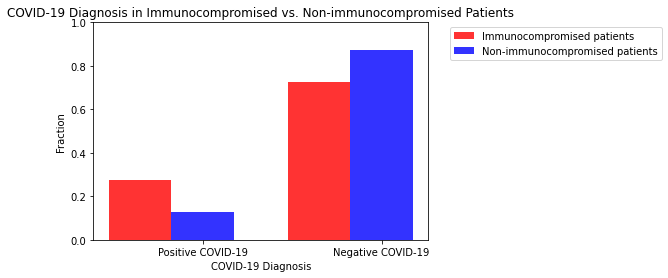

In [121]:
# Plot bar chart to compare incidence of testing positive for COVID-19 in immunocompromised vs non-immunocompromised patients.

# Data to plot
n_groups = 2
data_group1 = (0.273224043715847, 0.726775956284153)
data_group2 = (0.1282051282051282, 0.87179487179487180)

# Create plot
fig, ax = plt.subplots()
ax.set_ylim([0,1])
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, data_group1, bar_width,
alpha=opacity,
color='r',
label='Immunocompromised patients')

rects2 = plt.bar(index + bar_width, data_group2, bar_width,
alpha=opacity,
color='b',
label='Non-immunocompromised patients')

plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Fraction')
plt.title('COVID-19 Diagnosis in Immunocompromised vs. Non-immunocompromised Patients')
plt.xticks(index + bar_width, ('Positive COVID-19', 'Negative COVID-19'))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

> Approximately 27% of immunocompromised patients tested positive for COVID-19. This is higher than the 12% of non-immunocompromised patients who tested positive for COVID-19. 
---

Statistical Analysis of Positive COVID-19 Testing in Immunocompromised vs Non-Immunocompromised Patients

*   pO: p1 - p2 = 0
*   pA: p1 - p2 ≠ 0

> pO: There is no statistically significant difference in testing positive for COVID-19 between immunocompromised and non-immunocompromised patients.\
> pA: There is a statistically significant difference in testing positive for COVID-19 between immunocompromised and non-immunocompromised patients.

In [122]:
# Perform two sample z-test
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([50, 5])
nobs = np.array([183, 39])
stat, pval = proportions_ztest(count, nobs)
print('The p-value is ' + '{0:0.3f}'.format(pval))
if pval<=0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

The p-value is 0.057
Fail to reject null hypothesis.


>Since the p-value > 0.05, we can conclude with 95% confidence that there is no statistically significant difference in testing positive for COVID-19 between immunocompromised and non-immunocompromised patients.

>The p-value of 0.057 is very close to 0.05. This is inconclusive and we were not able to reject the null hypothesis since:
>*   The sample size is too small. 
>*   A lot of the values of the lab tests were null values since not all patients were tested equally for all the lab tests to detect whether they were immunocompromised or non-immunocompromised.
> However, this method of hypothesis testing may be repeated with a greater sample size to further test the statistical significance of testing positive for COVID-19 as an immunocompromised patient vs. non-immunocompromised patient.